In [81]:
!pip install indoNLP #or indonlp

In [ ]:
!pip install nlp-id

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 402.6/402.6 kB 29.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 43.6 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=6d56c611aa1acb17ed3c31944b2a9553adb621e350a7e31c0d4d34cce94884f0
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.0
    Uninstalling scikit-learn-1.6.0:
      Successfully uninstalled scikit-learn-1.6.0
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.27.0
    Uninstalling huggingface-hub-0.27.0:
      Successfully uninstalled huggingface-hub-0.27.0
ERROR: pip's dependency resolver does not currently take into account all the pac

In [82]:
#Menghubungkan Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [83]:
# Import Libraries
import json
import nltk
import time
import random
import re
import string
import pickle
import numpy as np
import pandas as pd
from io import BytesIO
import tensorflow as tf
import IPython.display as ipd
import matplotlib.pyplot as plt
from nlp_id.lemmatizer import Lemmatizer
from nltk.stem import WordNetLemmatizer
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,     # Untuk menghitung akurasi model
    precision_score,    # Untuk menghitung presisi
    recall_score,       # Untuk menghitung recall
    f1_score,           # Untuk menghitung skor F1
    classification_report  # Untuk menghasilkan laporan klasifikasi
)

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Input, Embedding, LSTM
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Flatten, Dense, GlobalMaxPool1D

In [84]:
import nltk #import library nltk

# Download the 'punkt' package untuk word tokenization.
nltk.download('punkt')
# Download the 'punkt_tab' package untuk sentence tokenization.
nltk.download('punkt_tab')
# Package lemmatization
nltk.download('wordnet')
# Package multilingual wordnet data
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [133]:
# Import dataset
with open('/content/GenerasiUnib.json') as content:
  data1 = json.load(content)

# Mendapatkan semua data ke dalam list
tags = [] # data tag
inputs = [] # data input atau pattern
responses = {} # data respon
words = [] # Data kata
classes = [] # Data Kelas atau Tag
documents = [] # Data Kalimat Dokumen
ignore_words = ['?', '!'] # Mengabaikan tanda spesial karakter
# Tambahkan data intents dalam json
for intent in data1['intents']:
  responses[intent['tag']]=intent['responses']
  for lines in intent['patterns']:
    inputs.append(lines)
    tags.append(intent['tag'])
    # digunakan untuk pattern atau teks pertanyaan dalam json
    for pattern in intent['patterns']:
      w = nltk.word_tokenize(pattern)
      words.extend(w)
      documents.append((w, intent['tag']))
      # tambahkan ke dalam list kelas dalam data
      if intent['tag'] not in classes:
        classes.append(intent['tag'])

# Konversi data json ke dalam dataframe
data = pd.DataFrame({"patterns":inputs, "tags":tags})

In [134]:
print(words)

['assalamualaikum', 'hallo', 'hai', 'hi', 'halo', 'selamat', 'pagi', 'pagi', 'siang', 'sore', 'malam', 'selamat', 'siang', 'selamat', 'sore', 'selamat', 'malam', 'assalamualaikum', 'hallo', 'hai', 'hi', 'halo', 'selamat', 'pagi', 'pagi', 'siang', 'sore', 'malam', 'selamat', 'siang', 'selamat', 'sore', 'selamat', 'malam', 'assalamualaikum', 'hallo', 'hai', 'hi', 'halo', 'selamat', 'pagi', 'pagi', 'siang', 'sore', 'malam', 'selamat', 'siang', 'selamat', 'sore', 'selamat', 'malam', 'assalamualaikum', 'hallo', 'hai', 'hi', 'halo', 'selamat', 'pagi', 'pagi', 'siang', 'sore', 'malam', 'selamat', 'siang', 'selamat', 'sore', 'selamat', 'malam', 'assalamualaikum', 'hallo', 'hai', 'hi', 'halo', 'selamat', 'pagi', 'pagi', 'siang', 'sore', 'malam', 'selamat', 'siang', 'selamat', 'sore', 'selamat', 'malam', 'assalamualaikum', 'hallo', 'hai', 'hi', 'halo', 'selamat', 'pagi', 'pagi', 'siang', 'sore', 'malam', 'selamat', 'siang', 'selamat', 'sore', 'selamat', 'malam', 'assalamualaikum', 'hallo', 'hai'

In [135]:
data

,patterns,tags
0,assalamualaikum,greeting
1,hallo,greeting
2,hai,greeting
3,hi,greeting
4,halo,greeting
...,...,...
69,oke,goodbye
70,thankyou,goodbye
71,stop,goodbye
72,ok,goodbye


In [136]:
data['patterns'] = data['patterns'].apply(lambda wrd:[ltrs.lower() for ltrs in wrd if ltrs not in string.punctuation])
data['patterns'] = data['patterns'].apply(lambda wrd: ''.join(wrd))

In [137]:
lemmatizer = WordNetLemmatizer()
words = [lemmatizer.lemmatize(w.lower()) for w in words if w not in ignore_words]
words = sorted(list(set(words)))

print (len(words), "unique lemmatized words", words)


72 unique lemmatized words ['1', '2', '3', '4', 'ada', 'aja', 'apa', 'assalamualaikum', 'aula', 'bagaimana', 'banyak', 'barang', 'bengkulu', 'bye', 'camera', 'darurat', 'dibawa', 'fakultas', 'gedung', 'gor', 'gsg', 'hai', 'hallo', 'halo', 'hi', 'ht', 'informasi', 'ingin', 'jika', 'kamera', 'kasih', 'kelas', 'kontak', 'kuliah', 'lain', 'lapangan', 'makasih', 'malam', 'meminjam', 'multimedia', 'nomor', 'ok', 'oke', 'pagi', 'peminjaman', 'pengeras', 'penting', 'perlu', 'pertanyaan', 'proyektor', 'ruang', 'saya', 'selamat', 'selesai', 'serbaguna', 'siang', 'sore', 'speaker', 'stadion', 'stop', 'suara', 'syarat', 'tahu', 'terima', 'thanks', 'thankyou', 'tidak', 'umum', 'unib', 'universitas', 'ya', 'yang']


In [138]:
classes = sorted(list(set(classes)))
print (len(classes), "classes", classes)

18 classes ['default', 'goodbye', 'greeting', 'informasi_umum', 'kontak_penting', 'peminjaman_barang', 'peminjaman_barang1', 'peminjaman_barang2', 'peminjaman_barang3', 'peminjaman_barang4', 'peminjaman_gedung', 'peminjaman_gedung1', 'peminjaman_gedung2', 'peminjaman_gedung3', 'peminjaman_lapangan', 'peminjaman_lapangan1', 'syarat_peminjaman', 'ucapan_terima_kasih']


In [139]:
print (len(documents), "documents")

408 documents


In [140]:
tokenizer = Tokenizer(num_words=2000)

# Melatih tokenizer pada kolom 'patterns' dalam DataFrame 'data'
# Proses ini menghasilkan indeks untuk setiap kata berdasarkan frekuensinya dalam dataset
tokenizer.fit_on_texts(data['patterns'])

# Mengubah teks dalam kolom 'patterns' menjadi urutan numerik berdasarkan indeks kata
# Misalnya: Jika "main" memiliki indeks 1 dan "belajar" memiliki indeks 2, maka teks "main belajar" -> [1, 2]
train = tokenizer.texts_to_sequences(data['patterns'])

# Menampilkan hasil tokenisasi berupa daftar urutan numerik untuk setiap pola dalam dataset
train

[[34],
 [35],
 [36],
 [37],
 [38],
 [5, 20],
 [20],
 [21],
 [22],
 [23],
 [5, 21],
 [5, 22],
 [5, 23],
 [6, 3],
 [1, 7, 2, 3],
 [8, 9, 1, 2, 3],
 [39],
 [40],
 [1, 7, 2, 3, 13],
 [8, 9, 1, 2, 3, 13],
 [3, 13],
 [10, 11],
 [1, 7, 2, 10, 11],
 [8, 9, 1, 2, 10, 11],
 [10, 14],
 [14],
 [14, 11],
 [12, 24],
 [1, 7, 2, 12],
 [8, 9, 1, 2, 12, 24],
 [12],
 [6, 15],
 [41],
 [16],
 [15, 16],
 [16, 25],
 [17],
 [15, 17],
 [17, 25],
 [6, 42],
 [43],
 [26],
 [4],
 [4, 26],
 [27],
 [44, 45],
 [4, 27],
 [46],
 [28],
 [4, 28],
 [29],
 [4, 29],
 [47, 48],
 [49],
 [30, 31, 32],
 [33, 32, 50],
 [51, 30, 52],
 [33, 31],
 [53, 6],
 [54, 55, 56, 57, 58],
 [18, 19],
 [59, 60],
 [61],
 [18, 19, 62],
 [],
 [1, 63, 64],
 [65, 66],
 [18, 19],
 [67],
 [68],
 [69],
 [70],
 [71],
 [72]]

In [141]:
x_train = pad_sequences(train)

# Menampilkan hasil setelah padding diterapkan
# Setiap urutan sekarang memiliki panjang yang sama, sesuai dengan panjang maksimum dalam dataset
print(x_train)  # Padding sequences


[[ 0  0  0  0  0 34]
 [ 0  0  0  0  0 35]
 [ 0  0  0  0  0 36]
 [ 0  0  0  0  0 37]
 [ 0  0  0  0  0 38]
 [ 0  0  0  0  5 20]
 [ 0  0  0  0  0 20]
 [ 0  0  0  0  0 21]
 [ 0  0  0  0  0 22]
 [ 0  0  0  0  0 23]
 [ 0  0  0  0  5 21]
 [ 0  0  0  0  5 22]
 [ 0  0  0  0  5 23]
 [ 0  0  0  0  6  3]
 [ 0  0  1  7  2  3]
 [ 0  8  9  1  2  3]
 [ 0  0  0  0  0 39]
 [ 0  0  0  0  0 40]
 [ 0  1  7  2  3 13]
 [ 8  9  1  2  3 13]
 [ 0  0  0  0  3 13]
 [ 0  0  0  0 10 11]
 [ 0  1  7  2 10 11]
 [ 8  9  1  2 10 11]
 [ 0  0  0  0 10 14]
 [ 0  0  0  0  0 14]
 [ 0  0  0  0 14 11]
 [ 0  0  0  0 12 24]
 [ 0  0  1  7  2 12]
 [ 8  9  1  2 12 24]
 [ 0  0  0  0  0 12]
 [ 0  0  0  0  6 15]
 [ 0  0  0  0  0 41]
 [ 0  0  0  0  0 16]
 [ 0  0  0  0 15 16]
 [ 0  0  0  0 16 25]
 [ 0  0  0  0  0 17]
 [ 0  0  0  0 15 17]
 [ 0  0  0  0 17 25]
 [ 0  0  0  0  6 42]
 [ 0  0  0  0  0 43]
 [ 0  0  0  0  0 26]
 [ 0  0  0  0  0  4]
 [ 0  0  0  0  4 26]
 [ 0  0  0  0  0 27]
 [ 0  0  0  0 44 45]
 [ 0  0  0  0  4 27]
 [ 0  0  0  0

In [142]:
# Membuat instance dari LabelEncoder untuk mengubah data kategori menjadi angka
le = LabelEncoder()

# Mengubah kolom 'tags' menjadi nilai numerik
# LabelEncoder akan memberikan nilai unik (numerik) untuk setiap kategori di 'tags'
# Misalnya: "greeting" -> 0, "goodbye" -> 1, dll.
y_train = le.fit_transform(data['tags'])

# Menampilkan hasil encoding output
# Output ini adalah representasi numerik dari label yang sebelumnya berupa kategori teks
print(y_train)

[ 2  2  2  2  2  2  2  2  2  2  2  2  2 10 10 10 10 11 11 11 11 12 12 12
 12 12 12 13 13 13 13 14 14 15 15 15 15 15 15  5  5  6  6  6  7  7  7  8
  8  8  9  9  3  3  4  4  4  4 16 16 17 17 17 17  0  0  0  1  1  1  1  1
  1  1]


In [143]:
input_shape = x_train.shape[1]

# Menampilkan panjang input
# Panjang ini akan digunakan sebagai dimensi input dalam model deep learning
print(input_shape)

6


In [144]:
vocabulary = len(tokenizer.word_index)

# Menampilkan jumlah kata unik dalam dataset
print("number of unique words : ", vocabulary)


number of unique words :  72


In [145]:
output_length = le.classes_.shape[0]

# Menampilkan panjang output (jumlah kelas unik)
print("output length: ", output_length)

output length:  18


In [146]:
import pickle

# Tentukan path folder di Google Drive
drive_path = '/content/drive/My Drive/'

# Simpan file di Google Drive
pickle.dump(words, open(drive_path + 'words.pkl', 'wb'))
pickle.dump(classes, open(drive_path + 'classes.pkl', 'wb'))

In [147]:

# Menyimpan objek LabelEncoder ('le') ke dalam file menggunakan modul 'pickle'
# File disimpan dalam format biner ('wb' = write binary)
# Lokasi penyimpanan: 'labelencoder.pkl'
pickle.dump(le, open('labelencoder.pkl', 'wb'))

# Menyimpan objek Tokenizer ('tokenizer') ke dalam file menggunakan modul 'pickle'
# File disimpan dalam format biner ('wb' = write binary)
# Lokasi penyimpanan: 'tokenizers.pkl'
pickle.dump(tokenizer, open('tokenizers.pkl', 'wb'))

In [148]:
# Membuat arsitektur model menggunakan TensorFlow Keras Functional API

# Layer Input: Mendefinisikan input dengan bentuk sesuai panjang urutan (input_shape)
# 'input_shape' adalah panjang dari setiap urutan setelah padding
i = Input(shape=(input_shape,))

# Layer Embedding: Mengubah indeks kata menjadi representasi vektor berdimensi 20
# Dimensi kosakata adalah 'vocabulary + 1' untuk memasukkan indeks nol (padding)
x = Embedding(vocabulary + 1, 20)(i)

# Layer LSTM: Menambahkan Long Short-Term Memory layer untuk mempelajari urutan kata
# LSTM memiliki 20 unit, dan 'return_sequences=True' untuk mengembalikan urutan keluaran
x = LSTM(20, return_sequences=True)(x)

# Layer Flatten: Mengubah keluaran LSTM (3D tensor) menjadi vektor 1D untuk layer Dense
x = Flatten()(x)

# Layer Dense: Menambahkan layer fully connected dengan jumlah neuron sesuai jumlah kelas
# 'output_length' adalah jumlah kelas unik, menggunakan aktivasi softmax untuk probabilitas
x = Dense(output_length, activation="softmax")(x)

# Membuat model dengan TensorFlow Keras Functional API
# Input adalah 'i' dan output adalah 'x'
model = Model(i, x)

# Kompilasi model: Menentukan fungsi loss, optimizer, dan metrik evaluasi
# - Loss: 'sparse_categorical_crossentropy' cocok untuk target yang berupa integer label
# - Optimizer: 'adam' adalah optimizer adaptif yang bekerja dengan baik untuk berbagai kasus
# - Metrics: 'accuracy' digunakan untuk mengevaluasi performa model
model.compile(loss="sparse_categorical_crossentropy", optimizer='adam', metrics=['accuracy'])

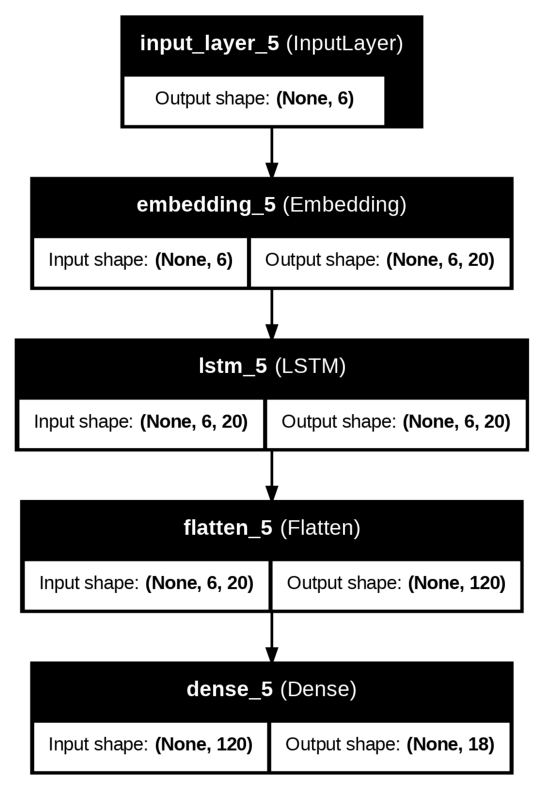

In [149]:
# Visualisasi Plot Arsitektur Model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# Tampilkan plot model
img = plt.imread('model_plot.png')
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis('off')
plt.show()

In [150]:
# Menampilkan Parameter Model
model.summary()


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 6)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding_5 (Embedding)              │ (None, 6, 20)               │           1,460 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 6, 20)               │           3,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 18)                  │           2,178 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,918 (27.02 KB)

 Trainable params: 6,918 (27.02 KB)

 Non-trainable params: 0 (0.00 B)

In [151]:
train = model.fit(x_train, y_train, epochs=500)

Epoch 1/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.0583 - loss: 2.8976
Epoch 2/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0728 - loss: 2.8897 
Epoch 3/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1155 - loss: 2.8846
Epoch 4/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1873 - loss: 2.8792  
Epoch 5/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1951 - loss: 2.8748
Epoch 6/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2118 - loss: 2.8683 
Epoch 7/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1766 - loss: 2.8641 
Epoch 8/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2001 - loss: 2.8545 
Epoch 9/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2118 - loss: 2.8450 
Epoch 10/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1610 - loss: 2.8443 
Epoch 11/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2118 - loss: 2.8230 
Epoch 12/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1571 - l

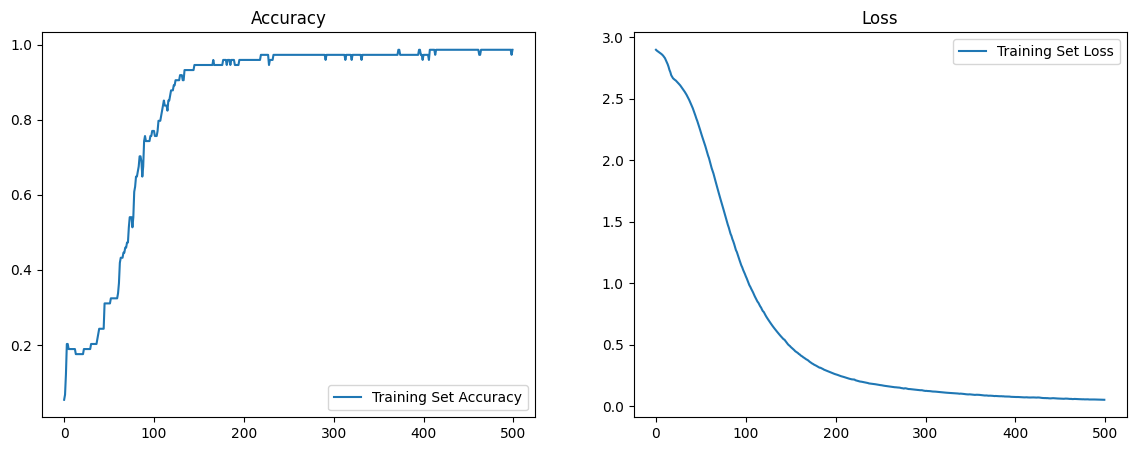

In [152]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(train.history['accuracy'], label='Training Set Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy')
# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(train.history['loss'], label='Training Set Loss')
plt.legend(loc='upper right')
plt.title('Loss')
plt.show()

In [153]:
import random
import string
import numpy as np
batas_probabilitas = 0.7
# Membuat Input Chat
while True:
  texts_p = []
  prediction_input = input('‍ Kamu : ')

  # Preprocessing teks
  prediction_input = [letters.lower() for letters in prediction_input if letters not in string.punctuation]
  prediction_input = ''.join(prediction_input)
  prediction_input = lemmatizer.lemmatize(prediction_input)
  texts_p.append(prediction_input)

  # Tokenisasi dan Padding
  prediction_input = tokenizer.texts_to_sequences(texts_p)
  prediction_input = np.array(prediction_input).reshape(-1)
  prediction_input = pad_sequences([prediction_input], input_shape)

  # Mendapatkan hasil keluaran pada model
  output = model.predict(prediction_input)
  output_probabilitas = round(output.max(), 2)
  output = output.argmax()

  # Memeriksa probabilitas
  if output_probabilitas < batas_probabilitas:
    print(" GenerasiUnib : Maaf, saya tidak mengerti pertanyaan anda.")
  else:
    # Menemukan respon sesuai data tag dan memainkan voice bot
    response_tag = le.inverse_transform([output])[0]
    print(" GenerasiUnib : ", random.choice(responses[response_tag]))

  time.sleep(0.08)
  print("="*60 + "\n")

  # Tambahkan respon 'goodbye' agar bot bisa berhenti
  if response_tag == "goodbye":
    break

‍ Kamu : hai
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step
 GenerasiUnib :  Yuk, sampaikan saja kebutuhan Anda! Silakan pilih fasilitas yang ingin Anda pinjam:
1. Peminjaman Gedung
2. Peminjaman Lapangan
3. Peminjaman Barang
4. Informasi Umum

Ketik angka atau nama kategori untuk melanjutkan.

‍ Kamu : pinjam gedung
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
 GenerasiUnib :  Berikut adalah gedung yang bisa Anda pinjam di Universitas Bengkulu:
- Gedung Serbaguna (GSG): Untuk acara besar seperti seminar atau wisuda.
- Ruang Kuliah: Untuk kegiatan belajar atau diskusi.
- Aula Fakultas: Untuk acara tingkat fakultas.

Pastikan Anda menghubungi pihak administrasi universitas atau fakultas terkait untuk proses peminjaman dan ketersediaan.

‍ Kamu : gsg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
 GenerasiUnib :  Untuk syarat peminjaman, silakan membawa:
1. Kartu Tanda Mahasiswa (KTM).
2. Surat Resmi Peminjaman. 
3. Surat Izin Kegiatan

‍ Kamu : ok
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
 GenerasiUnib :  Terima k